In [22]:
# Imports
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from icecream import ic

# custom Imports
from evaluate import evaluate_model, confusion_matrix_heatmap
from predata import target_train_tfidf, target_test_tfidf, test_train, test_test, target_train, target_test

In [23]:
########## Pipeline and Params
pipe = Pipeline([("smote", SMOTE(random_state=0)), ("nb", MultinomialNB())])
parameters = {"nb__alpha": [1]}

In [24]:
########### Searching Via GridSearchCV with Pipeline
nb_classifier = GridSearchCV(pipe, parameters, cv=3, n_jobs=-1)
nb_classifier.fit(target_train_tfidf, test_train)
ic(nb_classifier.best_estimator_)

ic| nb_classifier.best_estimator_: Pipeline(steps=[('smote', SMOTE(random_state=0)),
                                                   ('nb', MultinomialNB(alpha=1))])


Pipeline(steps=[('smote', SMOTE(random_state=0)),
                ('nb', MultinomialNB(alpha=1))])

In [25]:
# EVALUATING THIS CLASSIFIER
evaluate_model(
    target_train_tfidf, test_train, target_test_tfidf, test_test, nb_classifier
)

ic| scorings: array([0.36356275, 0.3541329 , 0.34440843])
ic| model_score: 0.345748987854251
ic| accuracy: 0.345748987854251
ic| confusion: array([[ 84, 167,  74],
                      [147, 249, 150],
                      [ 99, 171,  94]])


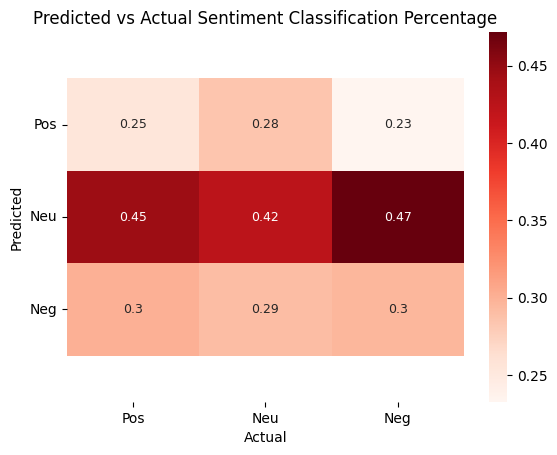

In [26]:

confusion_matrix_heatmap(nb_classifier, target_test_tfidf, test_test)